<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Random_Forest_Comapny_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
url = "https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/Company_Data.csv"

In [142]:
data = pd.read_csv(url)

In [143]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


EDA

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [145]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [146]:
#Find the average sales and classifying the categories that are greater than the average sales value
data["sales"]=(data["Sales"]>7.49)*1

In [147]:
data.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1


In [148]:
#Dropping the sales column from the data, since it is the target variable, 'y'

In [149]:
Data=data.drop(columns=['Sales'])

In [150]:
Data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1


In [151]:
#Correlation Matrix

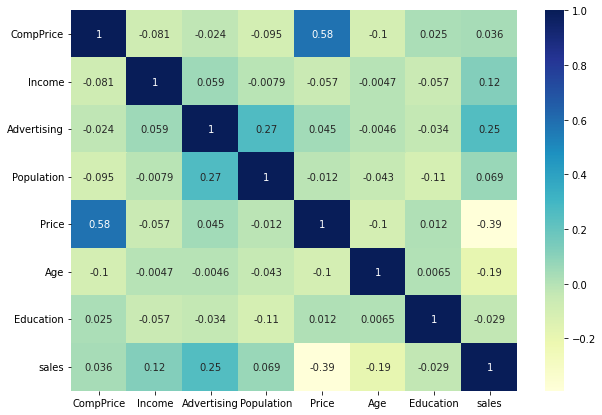

In [152]:
plt.figure(figsize=(10,7))
sns.heatmap(Data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [153]:
#Dropping Duplicates

In [154]:
Data[Data.duplicated()]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales


In [155]:
#Splitting the data into independent and target variables

In [156]:
x=Data.iloc[:,0:10]
y=Data.iloc[:,10]

In [157]:
x.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes


In [158]:
#splitting data into training and testing data set, to check the confusion matrix between the test and train data

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [160]:
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=0)

In [161]:
from sklearn.preprocessing import OrdinalEncoder

In [162]:
# Make copy to avoid changing original data 
label_x_train = x_train.copy()
label_x_test = x_test.copy()

In [163]:
# Get list of categorical variables

In [164]:
s = (Data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['ShelveLoc', 'Urban', 'US']


In [165]:
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_x_train[object_cols] = ordinal_encoder.fit_transform(x_train[object_cols])
label_x_test[object_cols] = ordinal_encoder.transform(x_test[object_cols])

In [166]:
label_x_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
336,138,35,6,60,143,0.0,28,18,1.0,0.0
64,100,67,12,184,104,2.0,32,16,0.0,1.0
55,143,81,5,60,154,2.0,61,18,1.0,1.0
106,102,33,0,217,139,2.0,70,18,0.0,0.0
300,116,78,1,158,99,2.0,45,11,1.0,1.0


#### Define the models

In [167]:

model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

##### Function for comparing different models

In [168]:
def score_model(model, X_t=label_x_train, X_v=label_x_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 0
Model 2 MAE: 0
Model 3 MAE: 0
Model 4 MAE: 0
Model 5 MAE: 0


In [177]:
# mean Absolute error
score_model(model_1)

0.32475

In [178]:
# mean Absolute error
score_model(model_2)

0.33637500000000004

In [179]:
# mean Absolute error
score_model(model_3)

0.373625

In [180]:
# mean Absolute error
score_model(model_4)

0.3531042504618395

In [181]:
# mean Absolute error
score_model(model_5)

0.3353522003216184

In [182]:
# We can see model_1 has lowest MAE